# **Predictive Analytics: Shinkansen Passenger Satisfaction**

## Data Preprocessing

**1. Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter("ignore")

**2. Load the training and test data separately**

In [2]:
#train data
surveydata_train = pd.read_csv("Surveydata_train.csv")
traveldata_train = pd.read_csv("Traveldata_train.csv")
#test data
surveydata_test = pd.read_csv("Surveydata_test.csv")
traveldata_test = pd.read_csv("Traveldata_test.csv")

**3. Understand the data (check for each of the following in both the train and test dataset)**
<ol>
<li>Check a sample of the data</li>
<li>Use the info() and describe() functions for more information</li>
<li>Look for the presence of null values in the dataset</li>
<li>Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns</li>
</ol>

In [3]:
#A. Check a sample of the data
surveydata_train.sample(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
10615,98810616,1,Extremely Poor,Green Car,NaN,Poor,Convenient,Poor,Poor,Poor,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Good,Poor
39377,98839378,0,Needs Improvement,Ordinary,Excellent,Needs Improvement,Inconvenient,Good,Needs Improvement,Good,Good,Good,Good,Good,Good,Good,Good
53569,98853570,1,Excellent,Green Car,Good,Good,Convenient,Acceptable,Needs Improvement,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
64003,98864004,0,Needs Improvement,Green Car,Good,Needs Improvement,Manageable,Excellent,Needs Improvement,Excellent,Excellent,Good,Good,Needs Improvement,Acceptable,Poor,Excellent
64558,98864559,1,Extremely Poor,Green Car,NaN,Extremely Poor,Inconvenient,Good,Acceptable,Acceptable,Excellent,Excellent,Excellent,Excellent,Needs Improvement,Excellent,Excellent


In [4]:
#A. Check a sample of the data
traveldata_train.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
21745,98821746,Male,Loyal Customer,47.0,NaN,Business,293,0.0,0.0
62368,98862369,Male,Disloyal Customer,52.0,Business Travel,Eco,2512,134.0,129.0
74899,98874900,Male,Loyal Customer,61.0,Personal Travel,Eco,1396,0.0,0.0
46704,98846705,Male,Loyal Customer,41.0,Business Travel,Eco,2484,0.0,0.0
62473,98862474,Male,Loyal Customer,43.0,Business Travel,Business,466,0.0,0.0


In [5]:
#B. Use the info() and describe() functions for more information
surveydata_train.info()
surveydata_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [6]:
#B. Use the info() and describe() functions for more information
traveldata_train.info()
traveldata_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [7]:
#C. Look for the presence of null values in the dataset
surveydata_train.isnull().values.any()

True

In [8]:
#C. Look for the presence of null values in the dataset
traveldata_train.isnull().values.any()

True

In [9]:
#D. Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns
surveydata_train.describe().columns.astype(str).str.contains("($|#)").any()

True

In [10]:
#D. Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns
traveldata_train.describe().columns.astype(str).str.contains("($|#)").any()

True

**4. Clean the data**
<ol>
<li>Treat for missing values in both the train & test set</li>
<li>Remove bad data values in both the train & test set</li>
<li>Encode the categorical object variables in both the train & test set</li>
<li>Perform Feature Engineering if necessary</li>
<li>Scale/Normalize the dataset if necessary</li>
</ol>

In [11]:
def dataframe_cleaning(df):
    # Before cleaning any data, it is important to transform Categorical values to numerical values
    # Retrieve categorical columns, which have data type as "object"
    df_object_columns = df.select_dtypes(include=['object']).columns
    # One-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, columns=df_object_columns, dummy_na=True)
    #A. Treat for missing values in both the train & test set
    imputer = KNNImputer(n_neighbors=15)
    #np array is created
    df_imputed = imputer.fit_transform(df_encoded)
    #back to dataframe
    df_without_nans = pd.DataFrame(data=df_imputed, columns=df_encoded.columns)
    
    return df_without_nans

In [12]:
#train data
surveydata_train_clean = dataframe_cleaning(surveydata_train)
traveldata_train_clean = dataframe_cleaning(traveldata_train)
#test data
surveydata_test_clean = dataframe_cleaning(surveydata_test)
traveldata_test_clean = dataframe_cleaning(traveldata_test)

In [13]:
#if a column is not present on the test set, then it is not important in the train set. Sans the target variable "Overall_Experience"
def shape_equalizer(df1, df2):
    """train, then test"""
    df1_columns = df1.columns
    df2_columns = df2.columns
    difference = list(set(df1_columns).difference(set(df2_columns)))
    if "Overall_Experience" in difference:
        difference.pop(difference.index("Overall_Experience"))
    df1 = df1.drop(difference, axis=1)
    return df1, df2

In [14]:
#survey data
surveydata_train_equalized, surveydata_test_equalized = shape_equalizer(surveydata_train_clean, surveydata_test_clean)
#travel data
traveldata_train_equalized, traveldata_test_equalized = shape_equalizer(traveldata_train_clean, traveldata_test_clean)

In [15]:
if surveydata_train_equalized.shape[0] == traveldata_train_equalized.shape[0] and surveydata_test_equalized.shape[0] == traveldata_test_equalized.shape[0]:
    print("Same number of rows between survey and travel data sets.")

Same number of rows between survey and travel data sets.


In [16]:
# -1 due to target column "Overall_Experience"
if surveydata_train_equalized.shape[1]-1 == surveydata_test_equalized.shape[1] and traveldata_train_equalized.shape[1] == traveldata_test_equalized.shape[1]:
    print("Same number of columns between test and train data sets.")

Same number of columns between test and train data sets.


In [17]:
#last, join the two datasets for train and the two datasets for test
#train
train_data = traveldata_train_equalized.merge(surveydata_train_equalized, on='ID')
#test
test_data = traveldata_test_equalized.merge(surveydata_test_equalized, on='ID')

## Model Building

In [18]:
# train, test, split for all
X = train_data.drop('Overall_Experience', axis=1)
y = train_data['Overall_Experience']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# save function for all
def results_to_csv(y_pred, var_name):
    data = test_data.copy()
    data['Overall_Experience'] = y_pred
    result = data[['ID', 'Overall_Experience']]
    #to integers
    result[['ID', 'Overall_Experience']] = result[['ID', 'Overall_Experience']].astype(int)
    #print head
    print(result.head(5))
    #save as csv
    name = "_".join(var_name.split('_')[-2:]) + '_result.csv'
    return result.to_csv(name, index=False)

#### xgboost

In [20]:
# Fit the model
xgb = XGBClassifier(objective= 'binary:logistic',
                    use_label_encoder= None,
                    base_score= None,
                    booster= None,
                    callbacks= None,
                    colsample_bylevel= None,
                    colsample_bynode= None,
                    colsample_bytree= 0.3,
                    early_stopping_rounds= None,
                    enable_categorical= False,
                    eval_metric= None,
                    feature_types= None,
                    gamma= None,
                    gpu_id= None,
                    grow_policy= None,
                    importance_type= None,
                    interaction_constraints= None,
                    learning_rate= 0.01,
                    max_bin= None,
                    max_cat_threshold= None,
                    max_cat_to_onehot= None,
                    max_delta_step= None,
                    max_depth= 5,
                    max_leaves= None,
                    min_child_weight= None,
                    monotone_constraints= None,
                    n_estimators= 2000,
                    n_jobs= None,
                    num_parallel_tree= None,
                    predictor= None,
                    random_state= 42,
                    reg_alpha= None,
                    reg_lambda= None,
                    sampling_method= None,
                    scale_pos_weight= None,
                    subsample= None,
                    tree_method= None,
                    validate_parameters= None,
                    verbosity= None)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [21]:
# Train the model
y_pred_train = xgb.predict(X_train)

In [22]:
# Evaluate model on training data
print(confusion_matrix(y_train, y_pred_train))

[[32697  1684]
 [ 2023 39099]]


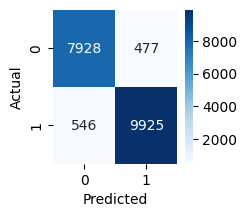

In [23]:
# Make predictions on validation data
y_pred_val = xgb.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)
#pretty plot
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels (depends on your problem)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [24]:
[[TN,FP],[FN,TP]] = cm
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
maybe_acc = Accuracy - 0.003
target = 0.9547778
print(f"cm:\n{cm}\nAccuracy:\t{Accuracy:.7f}\nPrecision:\t{Precision:.7f}\nRecall:\t\t{Recall:.7f}\nF1_score:\t{F1_score:.7f}\n\nMaybe Acc:\t{maybe_acc:.7f}\nTarget:\t\t{target:.7f}")


cm:
[[7928  477]
 [ 546 9925]]
Accuracy:	0.9458042
Precision:	0.9541434
Recall:		0.9478560
F1_score:	0.9509893

Maybe Acc:	0.9428042
Target:		0.9547778


In [25]:
# Make prediction
y_pred_test = xgb.predict(test_data)
y_pred_test

array([1, 1, 1, ..., 1, 1, 0])

In [26]:
#results_to_csv(y_pred_test_random_forest, "y_pred_test_random_forest")

#### RandomizedSearchCV 

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': range(50, 1000, 50),
    'learning_rate': [0.09999999999999999, 0.15, 0.2],
    'max_depth': range(3, 10, 1),
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8],
    'subsample': [0.3, 0.5, 0.7, 0.9],
    'min_child_weight': range(1, 6, 1),
    'gamma': np.arange(0, 0.5, 0.01),
    'reg_alpha': [0.0, 0.1, 0.2],
    'reg_lambda': [0.0, 0.1, 0.2],
    'scale_pos_weight': [1, 5, 10],
    'max_delta_step': range(0, 10, 2),
}

# Create a XGBoost classifier object
xgb_clf = XGBClassifier(objective ='binary:logistic', random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=2,
                                   random_state=42)

# Fit it to the data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49]),
                                        'learning_rate': [0.09999999999999999,
                                                          0.15, 0.2],
                                        'max_delta_step': range(0, 10, 2),
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(1, 6),
                                        'n_estimators': range(50, 1000, 50),
                                        'reg_alpha': [0.0, 0.1, 0.2],
                                        'reg_lambda': [0.0, 0.1, 0.2],
                                        'scale_pos_weight': [1, 5, 10],
                                        'subsample': [0.3, 0.5, 0.7, 0.9]},
                   random_state=42, scoring='accuracy', verbose=2)

In [38]:
# Print the best parameters and the corresponding score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'subsample': 0.9, 'scale_pos_weight': 1, 'reg_lambda': 0.2, 'reg_alpha': 0.1, 'n_estimators': 450, 'min_child_weight': 3, 'max_depth': 9, 'max_delta_step': 0, 'learning_rate': 0.09999999999999999, 'gamma': 0.33, 'colsample_bytree': 0.5}
Best score: 0.955246853964761


#### best model

In [62]:
my_params=xgb_clf.get_params()

In [87]:
my_params['subsample']= 0.9
my_params['n_estimators']= 1000
my_params['max_depth']= 15
my_params['learning_rate']= 0.09999999999999999
my_params['colsample_bytree']= 0.5

my_params['reg_lambda']= 0.2
my_params['reg_alpha']= 0.1
my_params['min_child_weight']= 2
my_params['gamma']= 0.25

In [88]:
updated_xgb = XGBClassifier(**my_params)
updated_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09999999999999999,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [89]:
# Train the model
y_pred_train_updated_xgb = updated_xgb.predict(X_train)

In [90]:
# Evaluate model on training data
print(confusion_matrix(y_train, y_pred_train_updated_xgb))

[[34381     0]
 [    0 41122]]


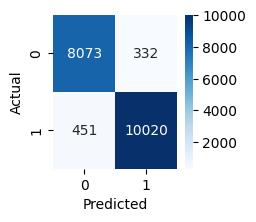

In [91]:
# Make predictions on validation data
y_pred_val_updated_xgb = updated_xgb.predict(X_val)
cm_updated = confusion_matrix(y_val, y_pred_val_updated_xgb)

#pretty plot
plt.figure(figsize=(2,2))
sns.heatmap(cm_updated, annot=True, fmt='d', cmap='Blues')
# Add labels (depends on your problem)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [92]:
[[TN,FP],[FN,TP]] = cm_updated
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
maybe_acc = Accuracy - 0.003
target = 0.9535138
print(f"cm:\n{cm_updated}\nAccuracy:\t{Accuracy:.7f}\nPrecision:\t{Precision:.7f}\nRecall:\t\t{Recall:.7f}\nF1_score:\t{F1_score:.7f}\n\nMaybe Acc:\t{maybe_acc:.7f}\nTarget:\t\t{target:.7f}")


cm:
[[ 8073   332]
 [  451 10020]]
Accuracy:	0.9585188
Precision:	0.9679289
Recall:		0.9569287
F1_score:	0.9623973

Maybe Acc:	0.9555188
Target:		0.9535138


In [93]:
# Make prediction
y_pred_test_updated_xgb = updated_xgb.predict(test_data)
y_pred_test_updated_xgb


array([1, 1, 1, ..., 0, 1, 0])

In [94]:
results_to_csv(y_pred_test_updated_xgb, "y_pred_test_updated_xgb")


         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1
